In [74]:
# to remove the future warning of the modules
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#importing libraries
import tensorflow as tf  #model library
import pandas as pd  #data reading and processing library
import seaborn as sns  #data visualisation library
from tensorflow.keras.layers import Normalization , Dense , InputLayer
from tensorflow.keras.losses import mean_squared_error,mean_absolute_error,huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("train.csv")  #read_csv is used to read csv file into the program


#we can also write the read_csv as 
#pd.read_csv("train.csv" , ",")

In [3]:
#now to see the head of data we use head() function
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [4]:
#to see the shape od data we use data.shape
data.shape

(1000, 12)

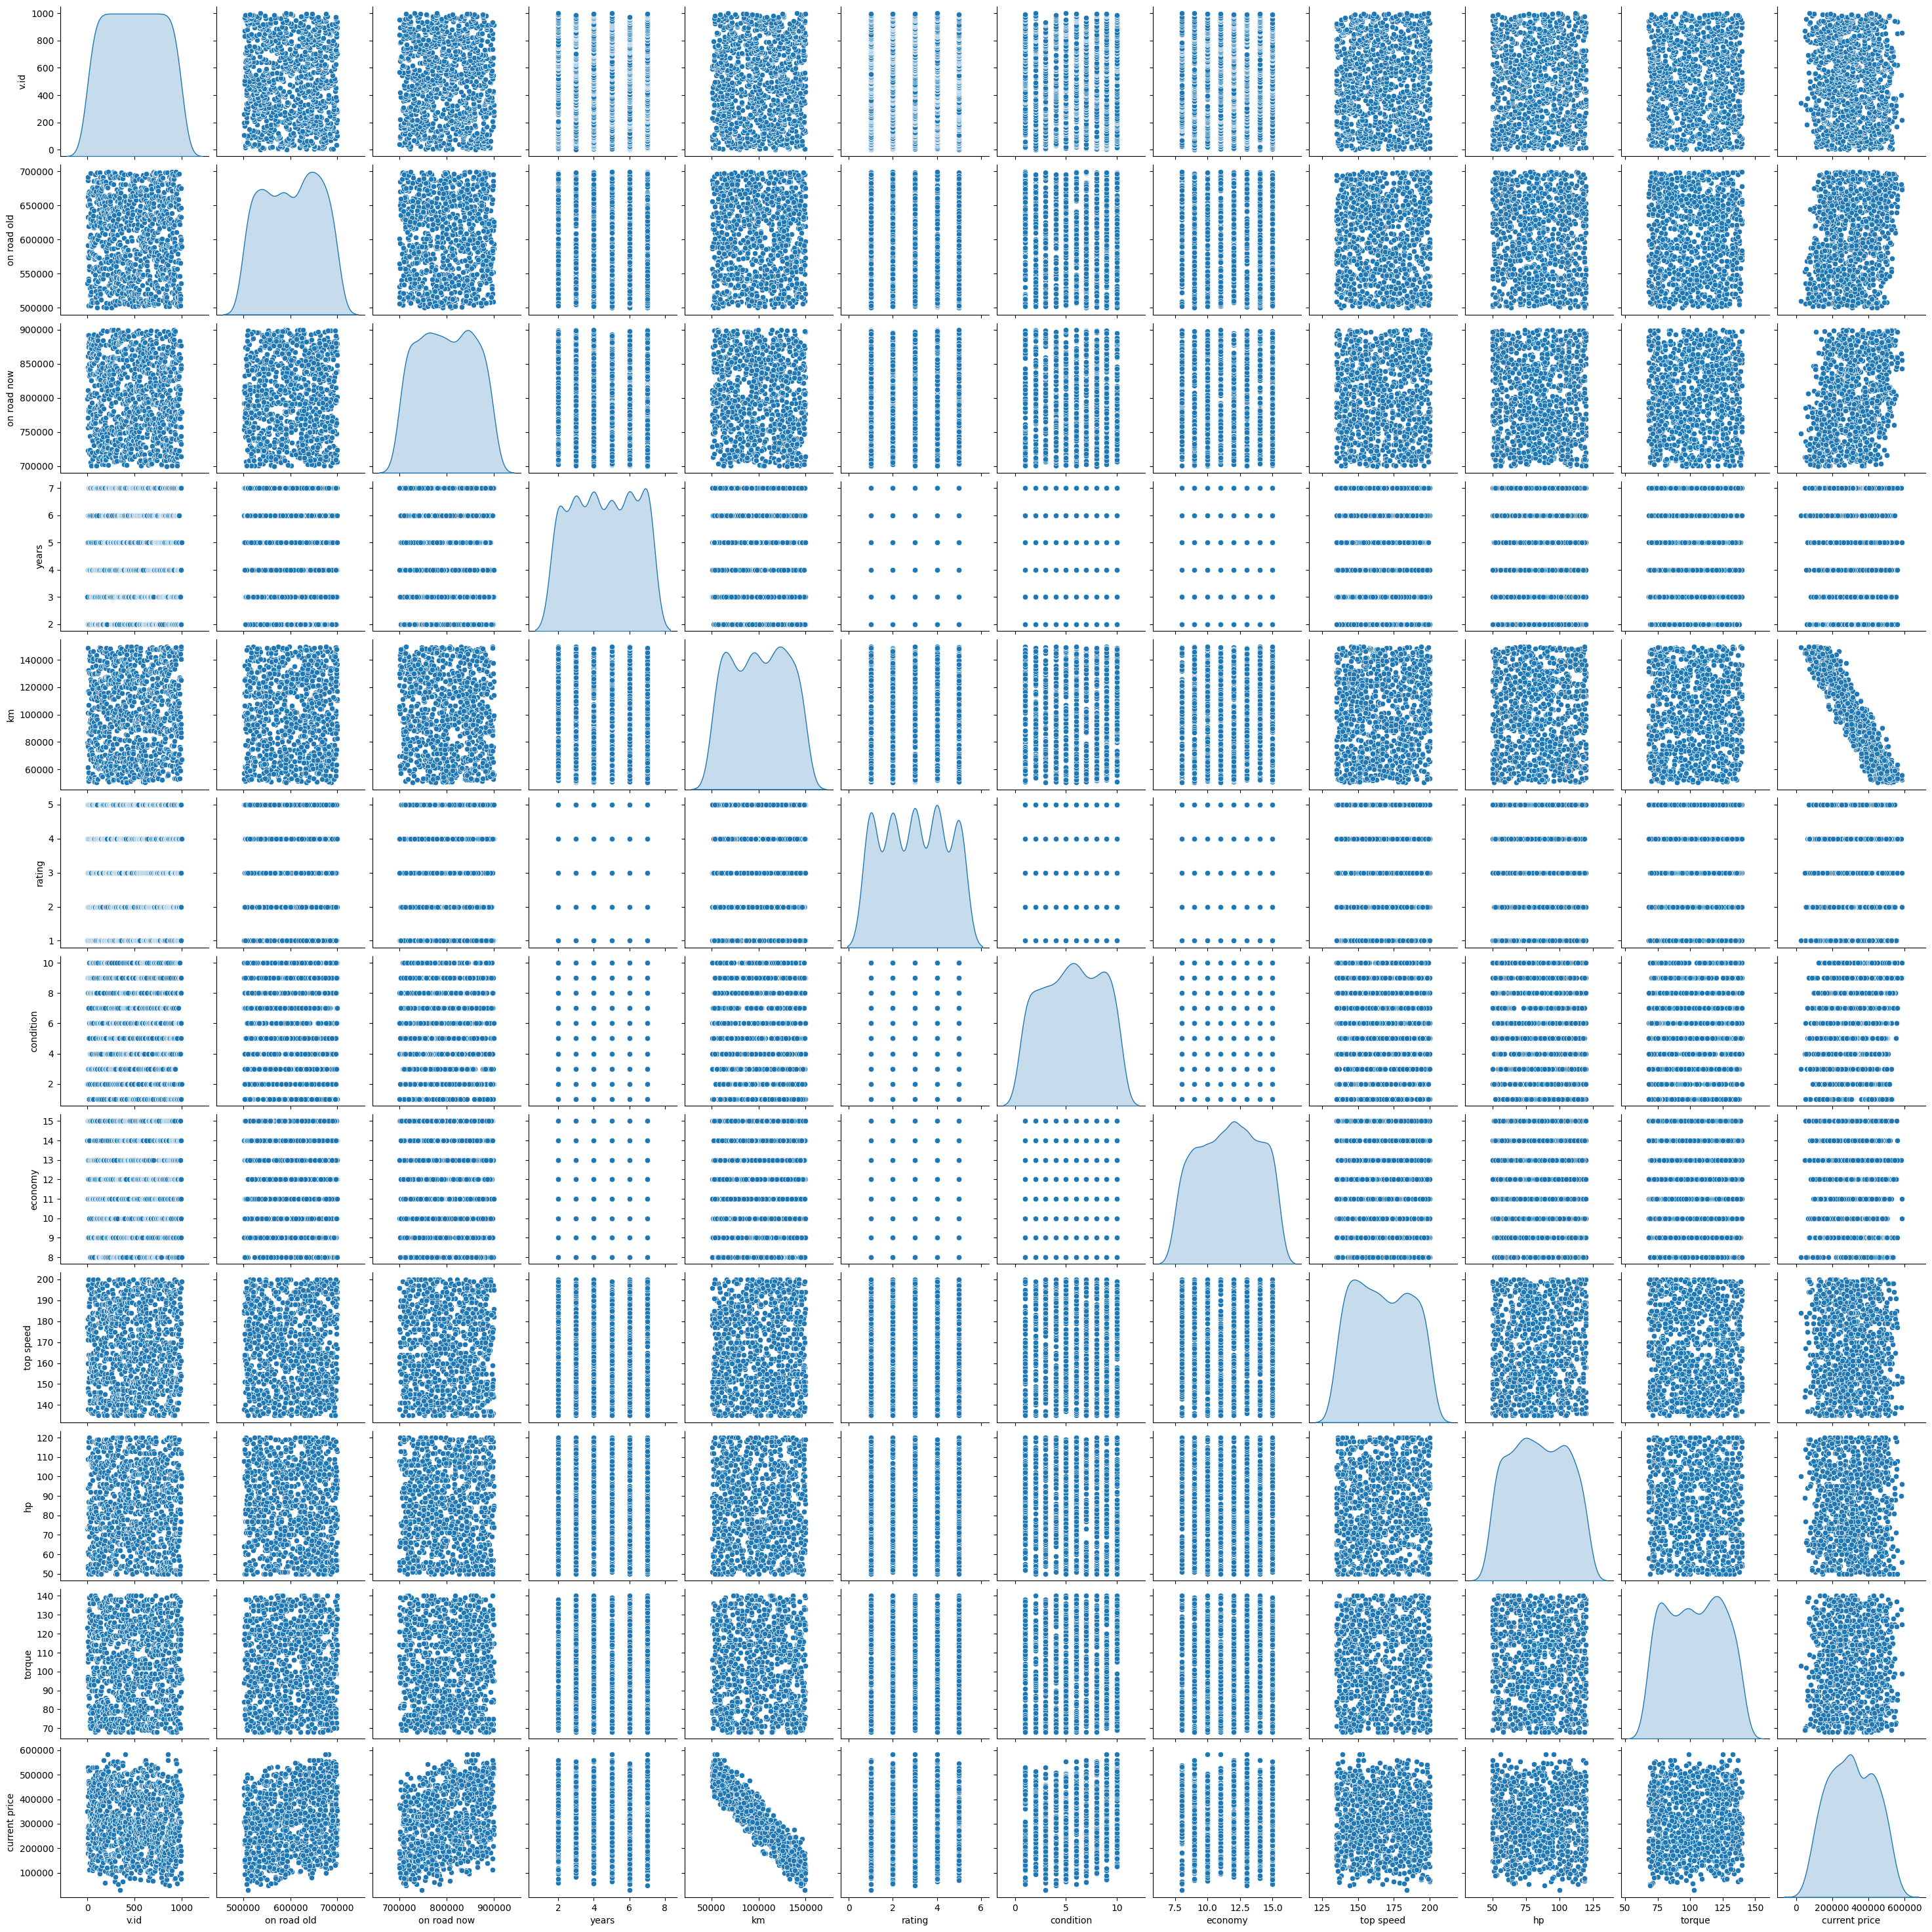

In [5]:
#to visualise the data we use the seabourn library here
#we use seabourn.pairplot function
sns.pairplot(data[["v.id","on road old","on road now","years","km","rating","condition","economy","top speed","hp","torque","current price"]],diag_kind='kde')

In [6]:
#used to get the headings of the dataframe
data.columns.values.tolist()

['v.id',
 'on road old',
 'on road now',
 'years',
 'km',
 'rating',
 'condition',
 'economy',
 'top speed',
 'hp',
 'torque',
 'current price']

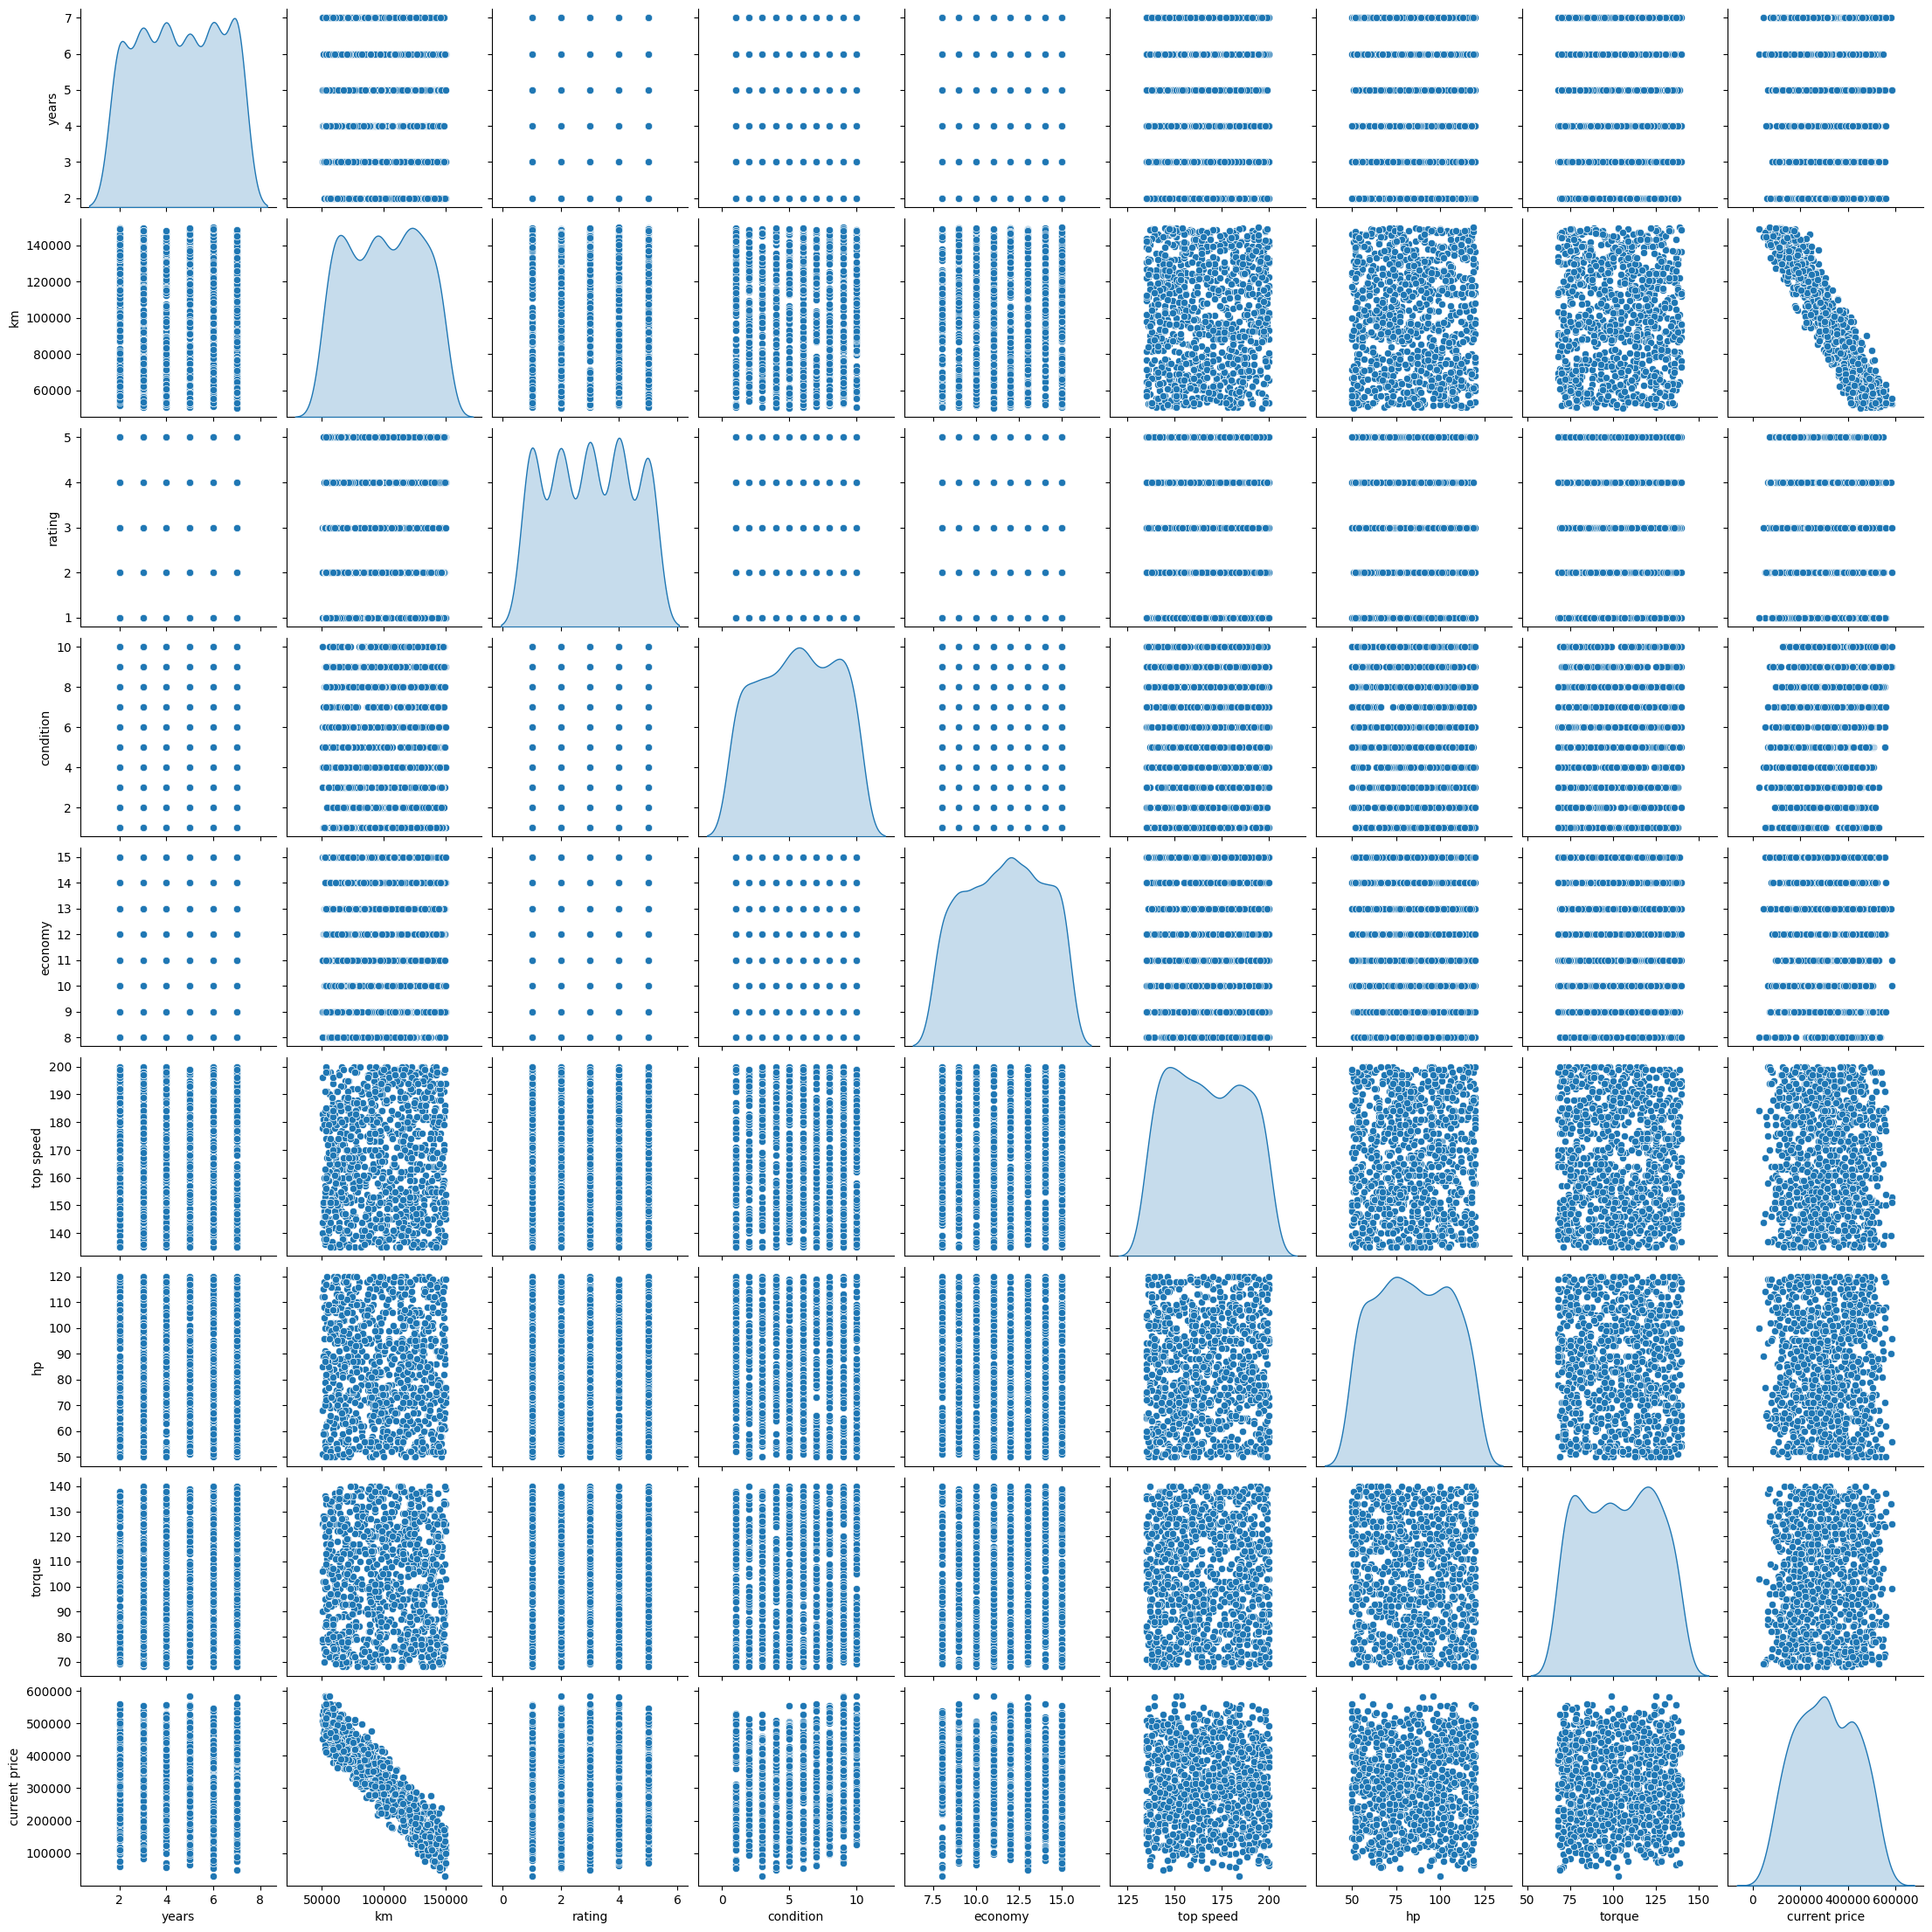

In [7]:
sns.pairplot(data[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],diag_kind='kde')

In [8]:
#to import the values as tensors
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data , tf.float32)  #type casting the data into float32
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [9]:
#to randomise the data values
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[5.160000e+02 5.805080e+05 8.166240e+05 ... 9.400000e+01 7.700000e+01
  4.663980e+05]
 [7.280000e+02 5.597010e+05 7.897830e+05 ... 7.700000e+01 7.300000e+01
  1.321590e+05]
 [6.430000e+02 5.038560e+05 7.687570e+05 ... 8.300000e+01 1.020000e+02
  3.274545e+05]
 ...
 [2.440000e+02 5.335580e+05 8.471750e+05 ... 1.160000e+02 1.340000e+02
  9.728050e+04]
 [9.080000e+02 6.237220e+05 8.885110e+05 ... 1.120000e+02 7.500000e+01
  4.135400e+05]
 [1.570000e+02 6.831630e+05 7.977070e+05 ... 5.300000e+01 7.500000e+01
  3.015910e+05]], shape=(1000, 12), dtype=float32)


In [10]:
#to extract the data from the label value
X = tensor_data[:,3:-1]
print(X.shape)

(1000, 8)


In [11]:
#to extract the label value
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis = -1)  #expand the dimensions as required by the tensor
print(y[:5])

tf.Tensor(
[[466398. ]
 [132159. ]
 [327454.5]
 [256356. ]
 [291031.5]], shape=(5, 1), dtype=float32)


In [38]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [40]:
x_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [41]:
x_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [42]:
x_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [43]:
#NORMALISATION
#use the normalisation function of the tensorflow library
#normalized value = (x - mean) / std

normalizer = Normalization()  #by default the axis is -1 and it automatically calculates the mean and std

normalizer.adapt(x_train)  #to adapt to the data set

normalizer(x_train)[:5]


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.5045977 , -1.305286  , -0.7002854 ,  0.8443531 , -1.6199263 ,
        -0.12883109,  0.46543851, -1.2291594 ],
       [ 0.2517416 ,  1.6342682 ,  0.01338191,  1.555387  ,  1.4942474 ,
        -0.5444185 , -0.3749722 , -1.4185888 ],
       [-0.91915125, -0.77385074,  0.01338191, -0.22219776,  1.4942474 ,
        -0.3366248 , -0.07835665, -0.04522633],
       [-1.5045977 ,  0.528092  , -1.4139527 , -0.93323165, -1.1750443 ,
        -1.3755933 ,  0.81149   , -0.23465562],
       [ 1.4226344 ,  0.04082002,  0.01338191,  0.8443531 , -1.1750443 ,
         0.18285948, -0.3749722 ,  1.1860641 ]], dtype=float32)>

In [44]:
print(x_train[:5])

tf.Tensor(
[[2.00000e+00 6.21880e+04 2.00000e+00 8.00000e+00 8.00000e+00 1.65000e+02
  9.40000e+01 7.70000e+01]
 [5.00000e+00 1.47852e+05 3.00000e+00 1.00000e+01 1.50000e+01 1.57000e+02
  7.70000e+01 7.30000e+01]
 [3.00000e+00 7.76750e+04 3.00000e+00 5.00000e+00 1.50000e+01 1.61000e+02
  8.30000e+01 1.02000e+02]
 [2.00000e+00 1.15616e+05 1.00000e+00 3.00000e+00 9.00000e+00 1.41000e+02
  1.01000e+02 9.80000e+01]
 [7.00000e+00 1.01416e+05 3.00000e+00 8.00000e+00 9.00000e+00 1.71000e+02
  7.70000e+01 1.28000e+02]], shape=(5, 8), dtype=float32)


In [80]:
#MODELLING 
#we will use tensorflow library to code our model
#we will use the deep learning technique to code the model

model = tf.keras.Sequential([
                InputLayer(input_shape =(8,)),
                normalizer,
                Dense(128,activation ='relu'),
                Dense(128,activation ='relu'),
                Dense(128,activation ='relu'),
                Dense(1)
])
model.summary()


#ANOTHER METHOD
# model = tf.keras.Sequential()
# model.add(normalizer)
# model.add(Dense(1))
# model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_11 (Dense)            (None, 128)               1152      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

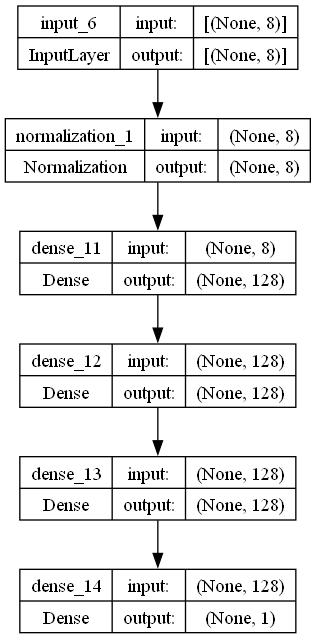

In [81]:
#taking output from the model
tf.keras.utils.plot_model(model , to_file="model.png",show_shapes=True)

In [82]:


#model.compile(loss = mean_squared_error)
 

#there can be many type of loss calculation
#we can do mean square error or mean absolute error depending on the type of data points
#if some data point are too much much dviated then giving them priority by squaring is not good
#so in these case we can use mean absolute error calculations

#there is also a special kind of function HUBER function 
#this function calculate the square loss for releavant data points 
# ans calculate absolute error for non relavant data points

#syntax

# model.compile(loss= mean_absolute_error)
# model.compile(loss= huber)


model.compile(optimizer = Adam(learning_rate=0.1),
              loss = mean_absolute_error,
              metrics = RootMeanSquaredError())

In [83]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 100,verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 147442.1094 - root_mean_squared_error: 198304.9844 - val_loss: 57557.4883 - val_root_mean_squared_error: 69189.7266
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 49826.1602 - root_mean_squared_error: 60985.8359 - val_loss: 44844.2852 - val_root_mean_squared_error: 54916.7656
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 43567.9609 - root_mean_squared_error: 53698.2266 - val_loss: 42683.2500 - val_root_mean_squared_error: 52778.4258
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 41503.3711 - root_mean_squared_error: 51181.2734 - val_loss: 47654.1602 - val_root_mean_squared_error: 58858.3281
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 40937.3164 - root_mean_squared_error: 51748.2969 - val_loss: 43424.4414 - val_root_mean_squared_error: 53039.4727
Epoch 6/100
25/25 [==============================] - 0s 3ms/ste

In [84]:
history.history

{'loss': [147442.109375,
  49826.16015625,
  43567.9609375,
  41503.37109375,
  40937.31640625,
  39922.390625,
  44817.84375,
  38390.88671875,
  37710.01953125,
  40644.42578125,
  44729.55859375,
  37739.11328125,
  45419.078125,
  41649.1015625,
  39626.265625,
  38181.18359375,
  37992.76171875,
  37395.76953125,
  41180.06640625,
  36399.4453125,
  36972.18359375,
  38646.11328125,
  41831.01953125,
  41139.08203125,
  34551.546875,
  36417.49609375,
  38670.2578125,
  37549.91796875,
  40681.8984375,
  40901.3984375,
  36924.3359375,
  42929.30078125,
  36716.765625,
  36778.05078125,
  42352.44921875,
  36566.9453125,
  37436.16796875,
  36240.1015625,
  35651.0859375,
  42105.734375,
  44130.0390625,
  38586.59765625,
  37318.24609375,
  37145.15234375,
  36064.8984375,
  37593.56640625,
  38767.15234375,
  36394.2109375,
  34395.61328125,
  37356.54296875,
  37069.42578125,
  34905.5546875,
  39941.2734375,
  35389.0703125,
  36955.83984375,
  35420.86328125,
  36907.03125,
 

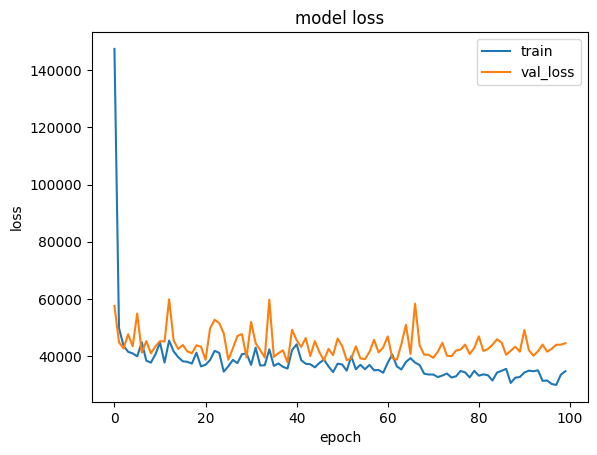

In [85]:
#using matplotlib to visualise the loss change graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

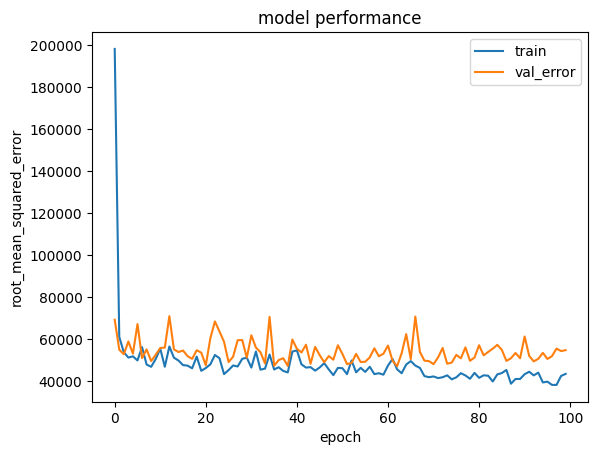

In [86]:
#using matplotlib to visualise the loss change graph
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train','val_error'])
plt.show()


In [87]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 42307.9219 - root_mean_squared_error: 52845.8242


[42307.921875, 52845.82421875]

In [89]:
#making our model to predict the output
# model.predict(x_test[0])
model.predict(tf.expand_dims(x_test[0],axis=0))  #converting the shpae 8 -> 1,8

1/1 [==============================] - 0s 33ms/step


array([[251428.1]], dtype=float32)

In [90]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([240296.5], dtype=float32)>

In [92]:
y_true = list(y_test[:,0].numpy())

In [93]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 1ms/step
[251428.1, 466796.88, 231772.97, 307573.03, 435312.53, 157139.19, 188124.0, 320014.9, 288694.0, 377747.7, 358690.16, 255794.72, 174945.72, 322124.1, 252691.56, 212218.39, 444116.53, 202668.05, 140498.02, 249656.34, 84082.58, 102411.055, 193154.44, 450970.34, 353976.6, 103629.08, 360913.4, 142377.03, 472125.06, 162524.4, 407608.12, 84812.75, 221531.1, 463132.47, 111966.2, 250630.62, 285983.2, 451126.97, 279006.47, 413585.06, 117958.77, 276532.1, 455153.1, 188175.53, 334675.25, 231059.81, 160052.53, 450049.97, 239347.03, 280792.88, 181355.06, 309990.62, 201341.77, 279381.6, 277150.97, 150763.6, 213531.33, 409657.9, 193440.47, 215686.19, 363842.9, 99148.0, 134623.8, 248011.19, 355209.22, 359410.28, 151962.52, 230467.02, 194698.89, 424048.84, 461626.03, 491326.2, 346035.97, 412659.75, 265229.88, 144133.22, 212061.62, 287879.16, 413091.8, 186339.25, 329903.16, 434169.1, 295756.3, 327549.03, 163849.25, 426316.88, 313379.44, 422460.88, 336305

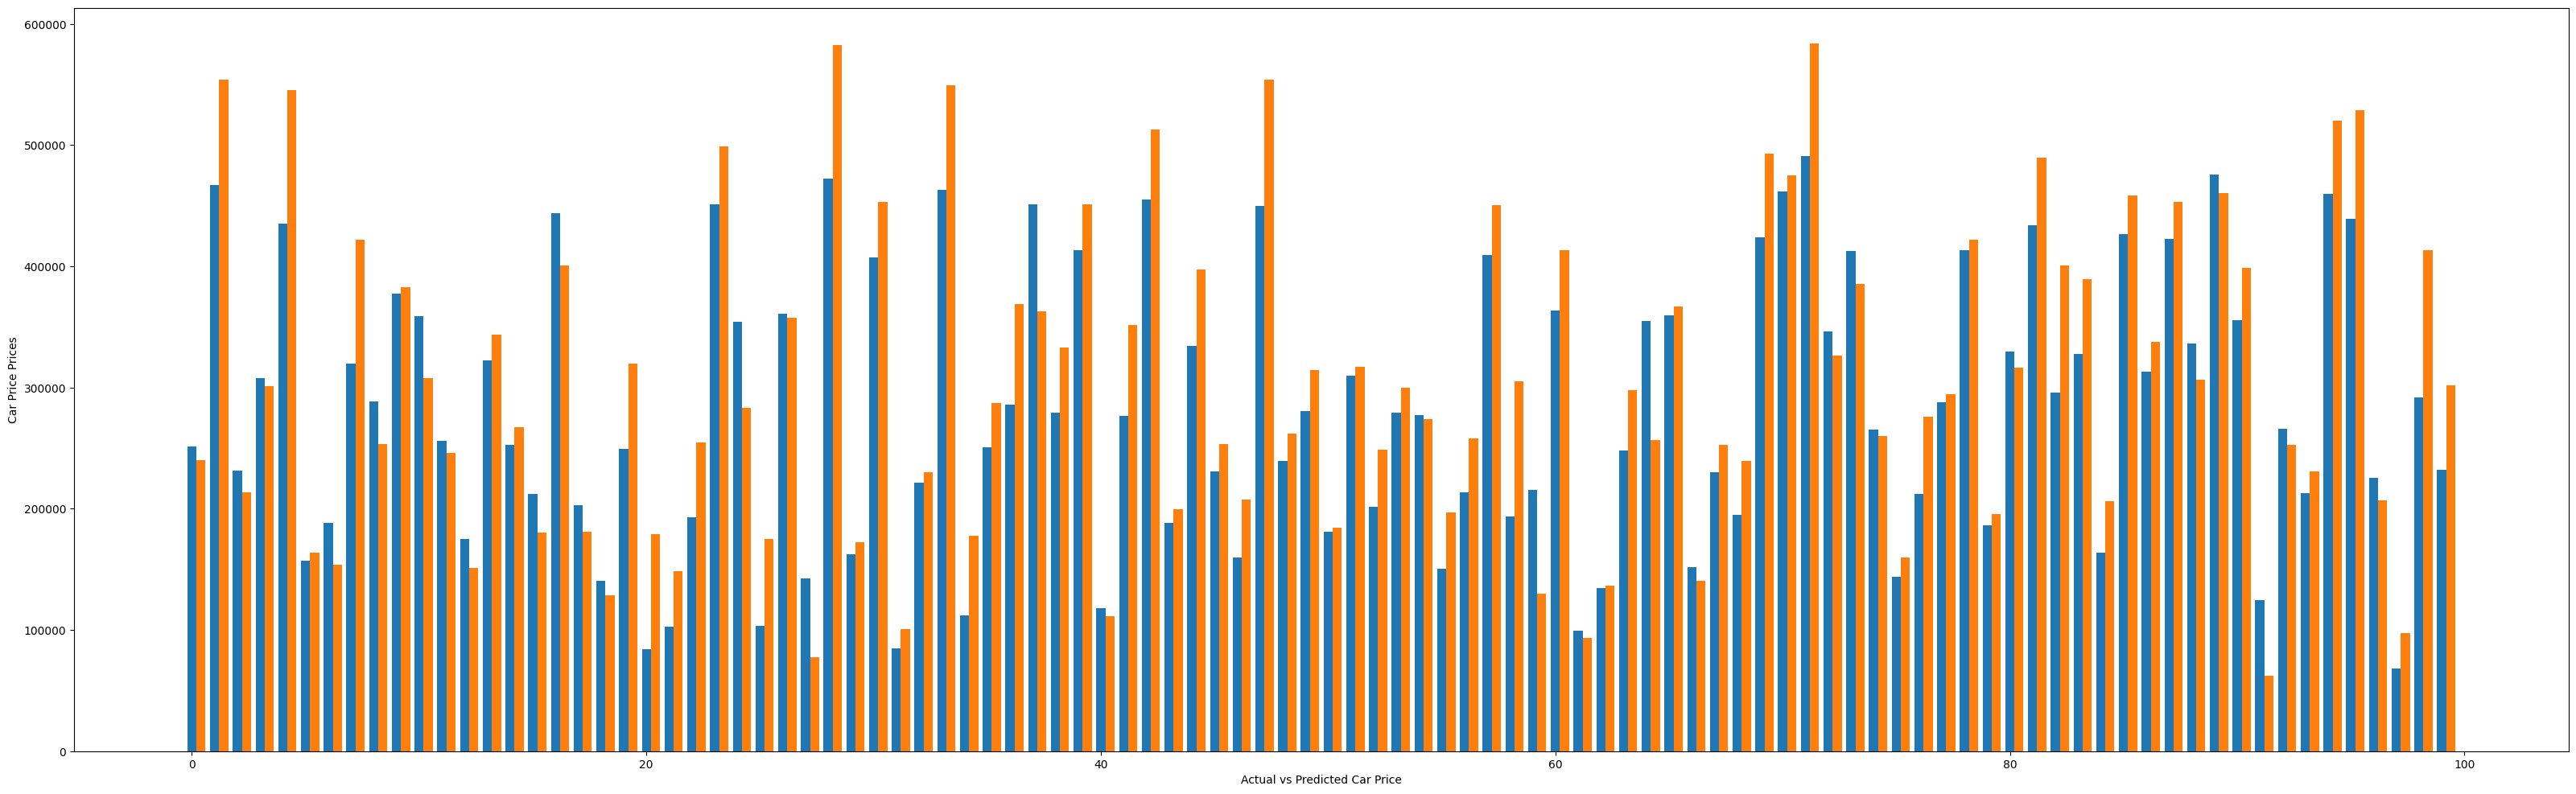

In [94]:
#printing a bar chart to show the true values and the predicted values
ind = np.arange(100)
plt.figure(figsize=(40,12))

width = 0.4
plt.bar(ind , y_pred , width , label='Predicted Car Price')
plt.bar(ind+width , y_true , width , label='Actual Car Price')

plt.xlabel('Actual vs Predicted Car Price')
plt.ylabel('Car Price Prices')

plt.show()